# ¿Que es Machine Learning?

### ¿Como podemos desarrollar sistemas que tengan algunas de estas funciones?

* Detectar si un correo electronico es _spam_ o no.
* Predecir el precio de las acciones de una compañia dentro de $x$ dias.
* Ordenar los resultados de una busqueda en base a su relevancia.
* Detectar rostros en una imagen.
* Transcribir texto (_Siri_)
* Autenticar huellas digitales
* Entender texto escrito por humanos

### Podemos diseñar algoritmos que aproximen la decision usando algun criterio, por ejemplo:

* El texto del correo tiene una liga a un sitio conocido con spam.
* Trazar una linea/curva/funcion que se siga la tendencia de los precios.
* Contar el numero de veces que aparecen las palabaras en los documentos y usar esta cantidad como orden para la lista.

## ¿Tener un criterio es suficiente?

Eso depende. ¿Que tal si los spammers cambian sus ligas?, ¿Que tal si la bolsa tiene una caida repentina inesperada?. En realidad no existe una solucion definitiva para muchos de estos problemas, si fuera asi, podriamos diseñar un algoritmo deterministico que lo resuleva.

## Entran los _Datos_:

Intuitivamente, nosotros podemos observar y aprender sobre los errores y aciertos. Podemos ver una foto y saber que personas aparecen, podemos detectar la voz de nuestros amigos, entender lo que dicen, pero no nacimos sabiendo, 
_aprendimos observando_.

### Asi como nosotros aprendemos, ¿La computadora tambien puede aprender?, ¿Como?

* Los usuarios de google leen los resumenes de las paginas y navegan a la que mas les interese.
* Tambien mandan el spam que llegue a su bandeja de entrada a la basura.
* Etiquetan a sus amigos de facebook en las fotos.

Todas estas acciones crean datos, muchas veces en gran escala. Si podemos identificar las _caracteristicas_ que los clasifican/ordenan/etiquetan/agrupan, muy posiblemente la computadora pueda aprender asi como nosotros.

## Un ejemplo

Supongamos que tenemos datos de clientes de Amazon.com compran libros. Por cada cliente, tenemos dos cifras:

* Edad.
* Porcentaje de libros de ciencia ficción que ha comprado en la tienda.
* Cuantos libros edición _Kindle_ ha comprado.

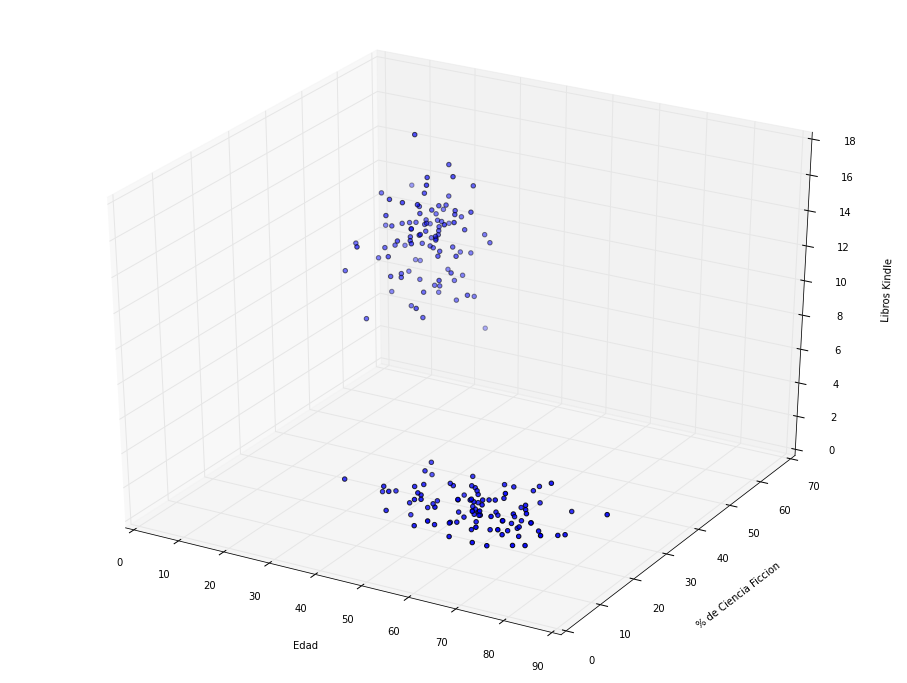

In [1]:
%matplotlib inline
import matplotlib.pylab as pylab
from matplotlib.pylab import *

from numpy.random import normal

# Generemos unos cuantos clientes mas o menos similares
# Tres cifras: (Edad, % de CF, # Libros Kindle)
casuales = concatenate(
    [ceil(normal(60, 10, (100, 1))),
     normal(15, 5, (100, 1)),
     floor(normal(3, .4, (100, 1)))]
    , axis=1)

# Ahora otros clientes tambien distribuidos similarmente entre ellos
geeks = concatenate(
    [ceil(normal(25, 5, (100, 1))),
     normal(50, 5, (100, 1)),
     floor(normal(12, 2, (100, 1)))]
    , axis=1)


# Vamos a combinarlos todos en un solo arreglo
lectores = concatenate([casuales, geeks], axis=0)

# Mostremoslos en una grafica
def mostrar(X, colores=None):
    from mpl_toolkits.mplot3d import Axes3D
    pylab.rcParams['figure.figsize'] = 16, 12  # that's default image size for this 
    
    fig = figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Edad')
    ax.set_ylabel('% de Ciencia Ficcion')
    ax.set_zlabel('Libros Kindle')
    
    if colores is not None:
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colores, cmap='summer')
    else:
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], cmap='coolwarm')
    
mostrar(lectores)

Es util que todas las dimensiones compartan la misma escala, asi que _normalizemos_ los datos de los clientes

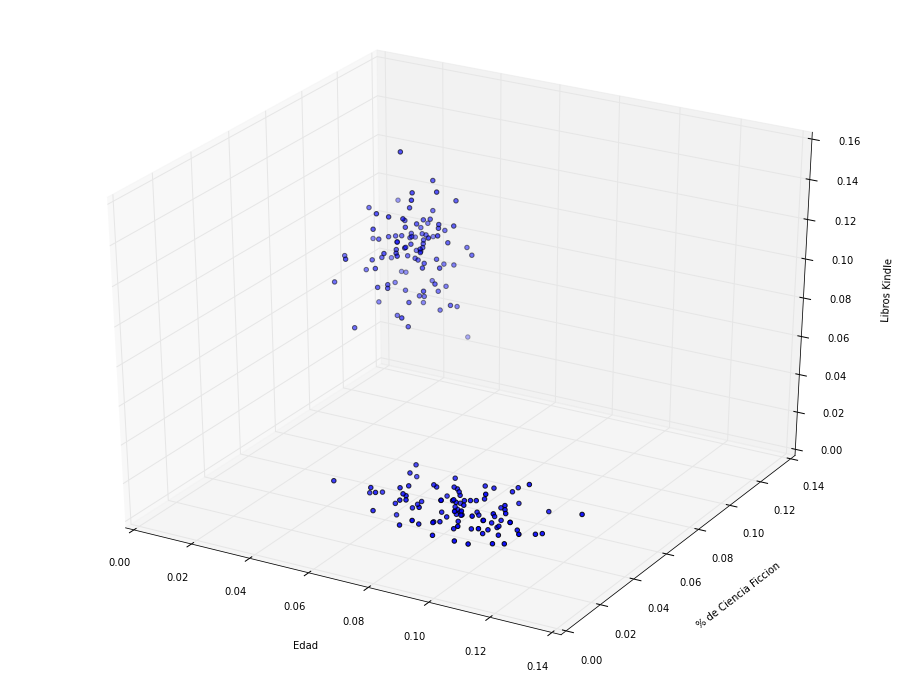

In [2]:
# Normalizar significa transformar los datos a la misima escala, usualmente [0, 1]
from sklearn.preprocessing import normalize

lectores_normalizados = normalize(lectores, axis=0)

mostrar(lectores_normalizados)

Observemos que los puntos parecen no haber cambiado, pero las escalas en los ejes son la misma. Claramente tenemos dos grupos de puntos bien definidos, pero, _¿como podemos hacer un programa que asigne un grupo a cada elemento?_.

Una opción es __inspeccionar visualmente__ la grafica y definir una division del plano que defina un area distinta para cada categoria, pero, __esto no generaliza__. Otra mejor opción es que utilizemos un algoritmo de _clustering_.

In [3]:
from sklearn.cluster import MeanShift

ms = MeanShift()

# Vamos a entrenar nuestro modelo y a asignar etiquetas a cada punto
tipos = ms.fit_predict(lectores_normalizados)

# Veamos unas cuantas de las predicciones
elementos = [3, 1 , 2, 197, 198, 199]

for clase, lector in zip(map(lambda t: 'Geek' if t == 1 else 'Casual', tipos[elementos]), lectores[elementos, :]):
    print 'Edad: %i\tCF: %3.0f%%\t# Kindle: %i\tEtiqueta: %s' % (lector[0], lector[1], lector[2], clase)

Edad: 61	CF:  17%	# Kindle: 3	Etiqueta: Casual
Edad: 60	CF:  17%	# Kindle: 2	Etiqueta: Casual
Edad: 59	CF:  14%	# Kindle: 3	Etiqueta: Casual
Edad: 27	CF:  51%	# Kindle: 12	Etiqueta: Geek
Edad: 31	CF:  39%	# Kindle: 9	Etiqueta: Geek
Edad: 19	CF:  46%	# Kindle: 11	Etiqueta: Geek


Ahora veamos los datos etiquetados en una grafica

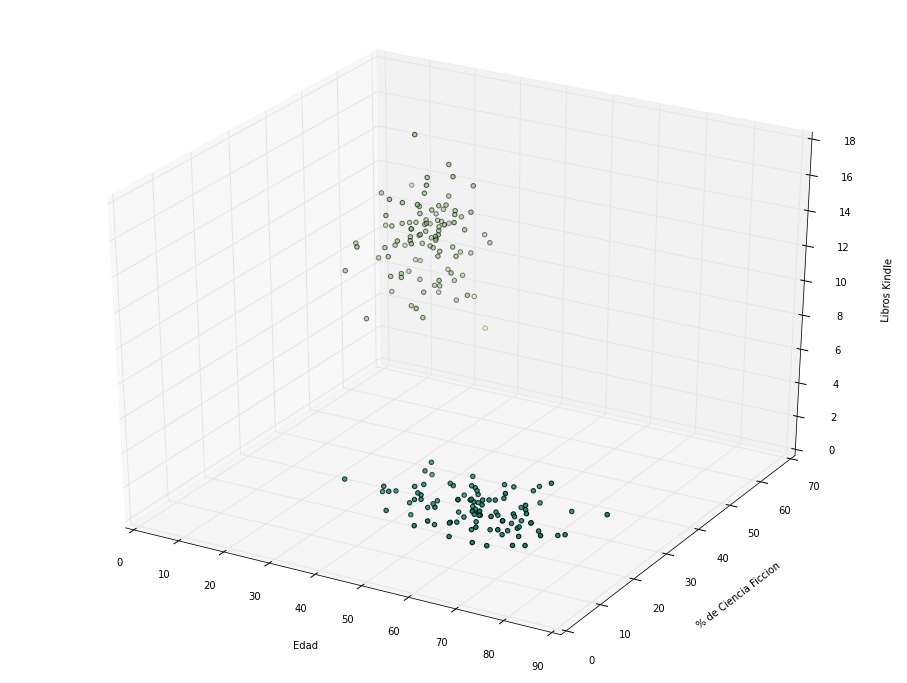

In [4]:
mostrar(lectores, colores=tipos)

El algoritmo calculo _automaticamente_ el __numero de grupos__ y grupo al que cada lector __pertenece__.

## Un poco mas formal y abstracto:

La computadora aprendióun patrón _(funcion que asocia los puntos)_ en los datos basandose en la __evidencia__ existente. El resultado del algotitmo es un __modelo__ cuyo proposito puede ser _explicar_ los datos, pero mas comunmente es _generalizar_ para predecir el valor asociado a algun punto que no ha sido observado previamente, es decir, no formó parte del _entrenamiento_ del modelo.

## Elaborando un poco

Hay varios tipos de problemas a resolver:

* __Clasificación__: Asignar una clase/etiqueta a cada elemento.
    * Una de muchas.
    * Multiples clases.
    * Clasificacion de sequencias.
* __Regresión__: Encontrar una función que aproxime la tendencia de los datos.
* __Agrupamiento__: Definir grupos basados en la similitud de sus elementos.
* __Ranking__: (Re)Ordenar los elementos en base a un criterio.

Tambien hay varios tipos de entrenamiento:

* __Supervisado__: Se conocen los valores reales de los datos, comunmente conocidos como _ground thruth_, y pretende crear un modelo que generalize.
* __No supervisado__: No se conocen los valores reales de los datos. El algoritmo descubre los patrones y aprende los valores.
* __Otros__: Semi-supervisados, _active learning_, _reinforcement learning_, etc.

## Otro ejemplo: Regresión

Supongamos que conocemos el historico del precio en la bolsa de las acciones de una empresa de alta tecnología, _Nearware Developent_, y nos gustaria especular un poco para ganar unos cuantos pesos.

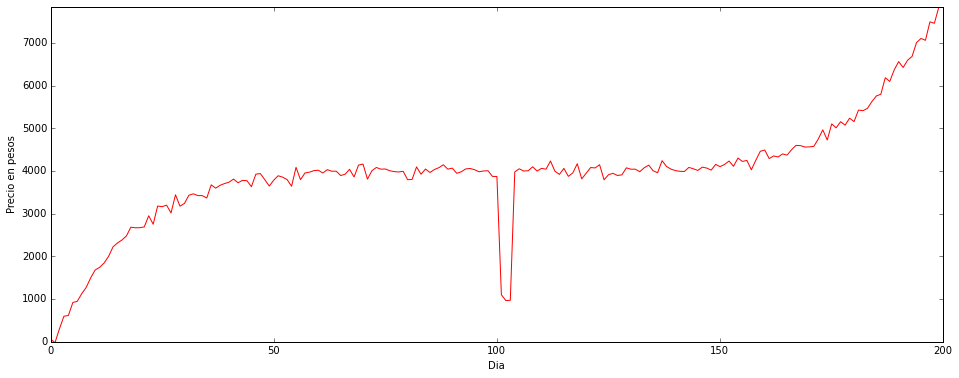

In [5]:
# Vamos a generar unos precios hipoteticos para las acciones de Nearware Development
from scipy.signal import square
pylab.rcParams['figure.figsize'] = 16, 6

dias = arange(0, 200, 1)

rango = arange(-100, 100, 1)
precios = 4E-7*pow(rango,5)+4000 + normal(0, 100, dias.shape)
shock = 1500*square(xrange(8))

precios[97:97+shock.shape[0]] += shock-1500

xlabel("Dia")
xlim([0, 200])
ylim([0, max(precios)])
ylabel("Precio en pesos")
plot(dias, precios, 'r')

Observemos que aproximadamente en el dia $130$, hubo un _crash_. Ahora, supongamos que solo conocemos los precios hasta el día $100$, y tratemos de aproximar un modelo predictivo.

In [6]:
# Vamos a crear un modelo de regresion usando solo las primeras 100 observaciones

# Creamos la matriz de diseño
def crear_fvectores(X):
    ret = zeros((X.shape[0], 2))
    for ix in xrange(X.shape[0]):
        ret[ix, :] = (1, log(X[ix]+4))
    
    return ret

X = crear_fvectores(dias)

La matriz de diseño contiene los vectores de caracteristicas. Cada dato se convierte en uno de estos. El vector de caracteristicas contiene la información que caracteriza al elemento. En este caso, los vectores son de dos dimensiones, el primer termino se conoce como _bias_ y el segundo es el valor de $\sin(x)$.

__El $80\%$ del tiempo utilizado en construir un modelo exitoso de machine learning se usa en definir y construir estos vectores. Este proceso se conoce como *Feature engineering*.__

Ahora, vamos a entrenar el modelo de regresión lineal.

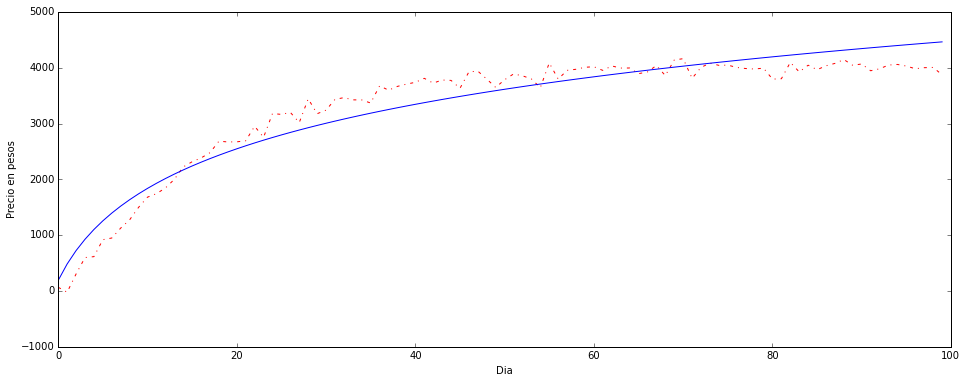

In [7]:
# Usemos un modelo de regresion lineal
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# Entrenemos
lr.fit(X[:100], precios[:100])

# Ahora grafiquemos el modelo
dominio = arange(0, 200, 1)
prediccion = lr.predict(crear_fvectores(dominio[:100]))

xlabel("Dia")
ylabel("Precio en pesos")
plot(dias[:100], precios[:100], 'r-.', label='Precio real')
plot(dominio[:100], prediccion, 'b', label='Prediccion')
#legend()

Aparentemente, la regresión es una buena aproximación al comportamiento observado de las acciones. Si asumimos que seguiran igual de fuertes, ¿Que tal si queremos generalizar el modelo y predecir cuales serian los valores que tomaria el precio despues del dia $100$?

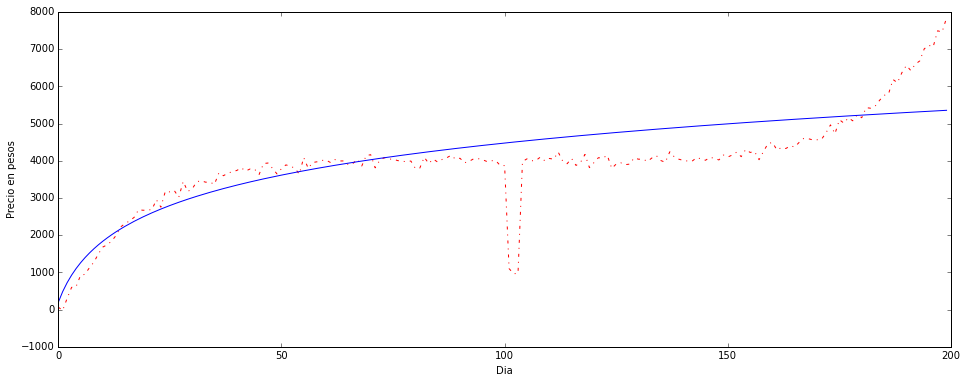

In [8]:
# Extrapolemos un poco

prediccion2 = lr.predict(crear_fvectores(dominio[100:]))
prediccion_total = concatenate((prediccion, prediccion2), axis=0)

# Ahora graficamos todos los datos
xlabel("Dia")
ylabel("Precio en pesos")
plot(dias, precios, 'r-.', label='Precio real')
plot(dominio, prediccion_total, 'b', label='Prediccion')
#legend()

### _¿Que fue lo que paso?_

El modelo no predijo que habria un shock y el precio de las acciones se vendria abajo ni el rebote. Tampoco refleja el crecimiento mas fuerte a partir del dia $150$.

La calidad de nuestras predicciones esta relacionada a la cantidad de datos que tenemos. Nuestro modelo nunca observo nada despues del día $100$, asi que hace su mejor esfuerzo por aproximar la funcion solo con lo que tiene. En general, no podemos generalizar mucho sin asumir que los datos que se vayan a observar despues son generados por el mismo proceso. En particular, no tenemos ninguna informacion de la caida que paso el día $100$ ni lo que paso despues, por lo tanto, esta generalización es de poco valor

### Encontrar el balance entre la generalización y la precisión

Encontrar un modelo adecuado no es facil, tenemos que llegar a un balance donde podamos predecir el valor que busquemos para un dato nunca antes visto y tener un nivel aceptable de precision. Un modelo demasiado general va a fallar mucho y un modelo demasiado ajustado va a tener un score perfecto con los datos de entrenamiento pero va a fallar miserablemente con datos nunca antes vistos.

Normalmente los datos se dividen en tres subconjuntos:

* Entrenamiento: Todos aquellos que vayan a ser usados por el algoritmos para el aprendizaje.
* Desarrollo: Los que se usan para ajustar los _hyperparametros_ del algoritmo.
* Prueba: Usados para medir el desempeño del modelo.

## ¿Como se mide el desempeño?

Dependiendo del problema, se usan diferentes medidas de desempeño, algunas de ellas son:

* __Clasificación__: Exactitud, precision, exhaustividad.
* __Agrupamiento__: Pureza, similaridad, distancia.
* __Regresión__: Error cuadratico medio, error absoluto medio.

## ¿Por donde seguir?

Algunas ligas de librerias y herramientas utiles para hacer machine learning y analisis de datos:

* [SciKit Learn](http://scikit-learn.org)
* [Pandas](http://pandas.pydata.org)
* [Matplotlib](http://matplotlib.org)
* [Statsmodels](http://statsmodels.sourceforge.net)
* [NumPy](http://www.numpy.org)